<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/CIFAR_IMPROVED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-beta1 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-beta1
2.18.0


In [2]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Loading the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train /255.0, x_test /255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train.shape (50000, 32, 32, 3)
y_train.shape (50000,)


In [4]:
K = len(set(y_train))
print('Number of classes', K)

Number of classes 10


In [19]:
# Build the model using the API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x) # padding same, para que no se haga mas chica la imagen
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [20]:
# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9431 - loss: 0.1677 - val_accuracy: 0.8153 - val_loss: 0.6942
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9500 - loss: 0.1461 - val_accuracy: 0.8291 - val_loss: 0.6527
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9573 - loss: 0.1270 - val_accuracy: 0.8267 - val_loss: 0.7344
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9591 - loss: 0.1248 - val_accuracy: 0.8213 - val_loss: 0.6929
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9607 - loss: 0.1162 - val_accuracy: 0.8375 - val_loss: 0.6707
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9655 - loss: 0.1080 - val_accuracy: 0.8273 - val_loss: 0.7788
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9674 - loss: 0.1005 - val_accuracy: 0.8281 - val_loss: 0.7959
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9696 - loss: 0

In [26]:
# DATA augmentation
# fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)
#r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs = 60)

Epoch 1/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:36 62ms/step - accuracy: 0.7500 - loss: 1.9094

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8101 - loss: 0.6169 - val_accuracy: 0.8343 - val_loss: 0.5161
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8438 - loss: 0.3588

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 828us/step - accuracy: 0.8438 - loss: 0.3588 - val_accuracy: 0.8341 - val_loss: 0.5192
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8587 - loss: 0.4338 - val_accuracy: 0.8531 - val_loss: 0.4461
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 801us/step - accuracy: 0.9688 - loss: 0.2228 - val_accuracy: 0.8535 - val_loss: 0.4467
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8689 - loss: 0.3998 - val_accuracy: 0.8450 - val_loss: 0.4657
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9062 - loss: 0.3279 - val_accuracy: 0.8462 - val_loss: 0.4624
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8766 - loss: 0.3707 - val_accuracy: 0.8561 - val_loss: 0.4425
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.9062 - loss: 0.2194 - val_accuracy: 0.8556 - val_loss: 0.4415
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8786 - loss: 0.36

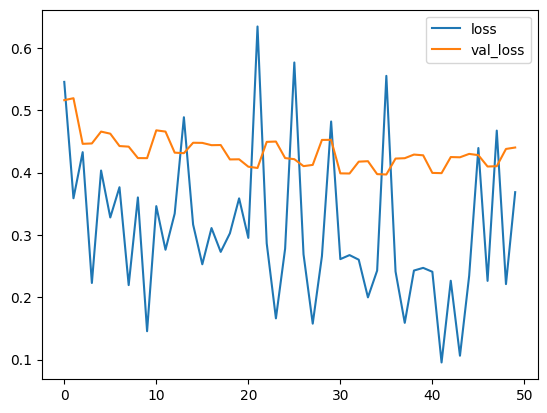

In [27]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
# overfitting

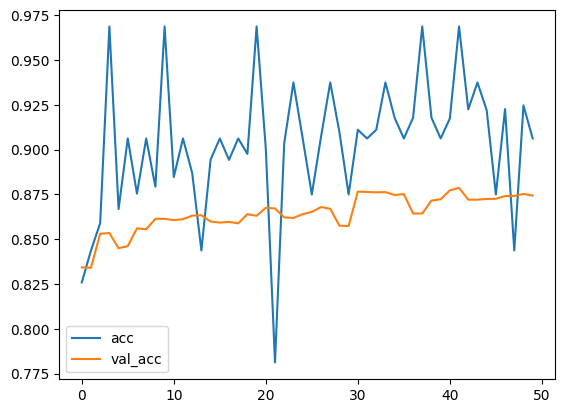

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
# overfitting

In [29]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
This function prints and plots the confusion matrix.
Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest')
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
             horizontalalignment='center',
             color= 'white' if cm[i,j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix, without normalization
[[895   9  26   8   6   2   1   3  39  11]
 [  5 951   0   1   0   0   1   0  12  30]
 [ 31   2 851  34  18  13  29   7  11   4]
 [ 16   5  33 788  35  54  42   5  12  10]
 [  9   1  58  43 830  11  27  14   3   4]
 [  9   2  24 133  15 771  27   9   3   7]
 [  8   3  31  26   4   7 913   2   4   2]
 [ 17   2  20  30  24  21   7 867   6   6]
 [ 21  12   2   3   2   0   0   1 948  11]
 [  9  42   1   1   1   1   1   1  13 930]]


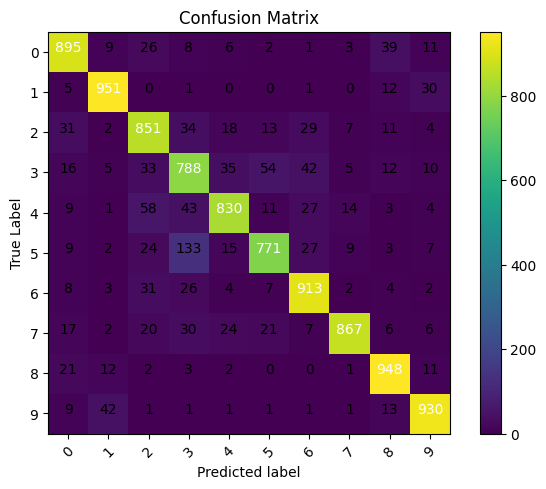

In [30]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [31]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: deer Predicted: cat')

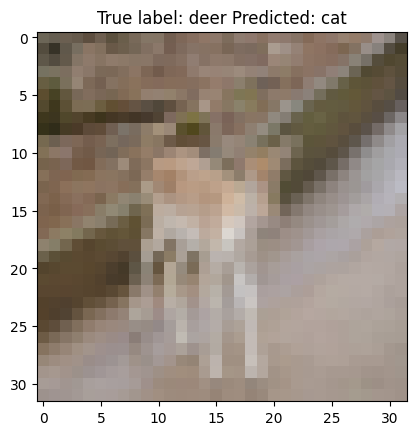

In [40]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]))

In [41]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)